In [1]:
# %pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import numpy as np
from scipy.integrate import solve_ivp
from deap import base, creator, tools, algorithms

In [2]:
df = pd.read_excel("../dados/Semibat_convertido_clean.xlsx")
df.columns = ['Ester_t','Ester_gl','Ester_mM','Amox_t','Amox_gl','Amox_mM','APA_t','APA_gl','APA_mM','POHPG_t','POHPG_gl','POHPG_mM']
df

,Ester_t,Ester_gl,Ester_mM,Amox_t,Amox_gl,Amox_mM,APA_t,APA_gl,APA_mM,POHPG_t,POHPG_gl,POHPG_mM
0,9.859813,6.133333,34.040034,14.719626,0.883436,2.417722,10.163551,15.409471,71.254373,15.070093,-0.024540,-0.146805
1,20.017523,5.866667,32.560033,29.906542,1.262440,3.454954,19.976636,15.186630,70.223941,29.789720,0.368098,2.202071
2,29.827687,5.733333,31.820032,39.953271,1.546012,4.231013,30.140187,15.008357,69.399596,39.953271,0.417178,2.495680
3,39.986371,5.511111,30.586697,59.929907,2.110429,5.775669,39.953271,15.498607,71.666546,59.929907,0.736196,4.404142
4,50.145055,5.288889,29.353363,85.864486,2.797546,7.656119,49.766355,15.320334,70.842200,86.214953,0.073620,0.440414
5,59.973715,6.000000,33.300033,103.037383,3.067485,8.394868,59.929907,15.186630,70.223941,103.037383,1.079755,6.459408
6,70.132399,5.777778,32.066699,112.149533,3.042945,8.327709,69.742991,15.008357,69.399596,111.799065,0.858896,5.138165
7,80.292056,5.600000,31.080031,141.939252,3.558282,9.738047,79.906542,15.498607,71.666546,142.289720,0.809816,4.844556
8,90.103193,5.511111,30.586697,155.257009,3.975460,10.879749,90.070093,15.364903,71.048287,155.257009,1.055215,6.312603
9,100.261877,5.288889,29.353363,181.191589,4.073620,11.148384,100.233645,15.186630,70.223941,181.542056,1.128834,6.753017


In [3]:
CAB_medida  = df.loc[:,'Ester_mM'].dropna().to_numpy()
CAN_medida = df.loc[:,'Amox_mM'].dropna().to_numpy()
CNH_medida = df.loc[:,'APA_mM'].dropna().to_numpy()
CAOH_medida = df.loc[:,'POHPG_mM'].dropna().to_numpy()
t_cab = df.loc[:,'Ester_t'].dropna().to_numpy().round(0)
t_can = df.loc[:,'Amox_t'].dropna().to_numpy().round(0)
t_cnh = df.loc[:,'APA_t'].dropna().to_numpy().round(0)
t_caoh = df.loc[:,'POHPG_t'].dropna().to_numpy().round(0)
tempo_substratos = t_cab
tempo_produtos = t_can
CAB_medida_t = np.hstack([CAB_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAN_medida_t = np.hstack([CAN_medida.reshape(-1,1),t_can.reshape(-1,1)])
CNH_medida_t = np.hstack([CNH_medida.reshape(-1,1),t_cab.reshape(-1,1)])
CAOH_medida_t = np.hstack([CAOH_medida.reshape(-1,1),t_can.reshape(-1,1)])
medidas_exp_list = [CAB_medida_t,CAN_medida_t,CNH_medida_t,CAOH_medida_t]
t_total = np.unique(np.sort(np.hstack([t_can,t_cab])))


In [4]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [5]:
def enzymic_amox(t, y, kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH):
    FAB = 0
    FNH = 0 

    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    Cez = 1  # Assuming a constant value for Cez if not provided

    # Consumo de ester
    VAB = (kcat1 * CAB * Cez) / ((Km1 * (1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2 * CAN * Cez) / ((Km2 * (1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X = CNH / (Ken + CNH)
    
    # Sintese enzimatica
    VS = VAB * Tmax * X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = (-(VS - VAN) - (Vh1 + VAN)) + FAB 
    
    # C. amox
    dy[1] = VS - VAN                        
    
    # C. 6-apa
    dy[2] = -(VS - VAN) + FNH                
    
    # C. POHPG
    dy[3] = Vh1 + VAN
    
    return dy


In [6]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


In [7]:
kcat1        = 0.181
kcat2        = 0.395
Km1          = 5.449
Km2          = 1.694
Tmax         = 0.824
Ken          = 7.947
kAB          = 0.682
kAN          = 1.989
kAOH         = 9.856
kNH          = 9.763

P = np.zeros(10)
P[0]   = kcat1    
P[1]   = kcat2    
P[2]   = Km1      
P[3]   = Km2      
P[4]   = Tmax     
P[5]   = Ken      
P[6]   = kAB      
P[7]   = kAN      
P[8]   = kAOH     
P[9]  = kNH 
Np = len(P)



In [8]:
def ode15s_amox_fed(P, t):
    fed_t = np.unique(np.sort(np.hstack([fed_ab[0], fed_nh[0]])))
    CI_ode = np.array([CAB_medida[0], CAN_medida[0], CNH_medida[0], CAOH_medida[0]])
    all_t = []
    last_index = 0

    for fed in fed_t:
        current_segment = []
        for p in t[last_index:]:
            current_segment.append(p)
            if p == fed:
                break
        all_t.append(current_segment)
        last_index += len(current_segment) - 1

    all_t.append(list(t[last_index:]))


    final_Y = np.zeros([4, 1])

    for t_segment in all_t:
        if len(t_segment) < 2:
            continue  # Skip if the segment is too short
        Y = scipy.integrate.solve_ivp(enzymic_amox, t_span=(t_segment[0], t_segment[-1]), t_eval=t_segment, y0=CI_ode, method='LSODA', args=P)
        
        if Y.status < 0:
            print("Solver failed to converge. Exiting.")
            return np.full_like(final_Y, np.nan)  # Return NaN if the solver fails

        Y = Y.y
        CI_ode = Y[:, -1]

        if t_segment[-1] in fed_ab[0]:
            CI_ode[0] = fed_ab[1][list(fed_ab[0]).index(t_segment[-1])]
        if t_segment[-1] in fed_nh[0]:
            CI_ode[2] = fed_nh[1][list(fed_nh[0]).index(t_segment[-1])]

        final_Y = np.hstack([final_Y, Y[:, :-1]])

    final_Y = np.hstack([final_Y, Y[:, -1].reshape(-1, 1)])
    final_Y = np.delete(final_Y, 0, 1)

    return final_Y

In [9]:

def calculate_error(model_matrix, experimental_data_list):
    model_time = model_matrix[:, -1]
    total_error = 0
    for var_index, experimental_data in enumerate(experimental_data_list):
        model_variable_data = model_matrix[:, var_index]
        exp_time = experimental_data[:, -1]
        exp_values = experimental_data[:, 0]

        for t, exp_value in zip(exp_time, exp_values):
            if not np.isnan(exp_value):
                model_value = model_variable_data[model_time == t]
                if model_value.size > 0:
                    total_error += (exp_value - model_value[0]) ** 2
    print(total_error, end="\r")
    return total_error

In [10]:

def objective_function(params):
    kcat1, kcat2, Km1, Km2, Tmax, Ken, kAB, kAN, kAOH, kNH = params
    sol = ode15s_amox_fed(params, t_total)
    model_output = sol.T
    model_output = np.hstack([model_output, t_total.reshape(-1, 1)])
    return (calculate_error(model_output, medidas_exp_list),)


In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

param_bounds = [(0.05,0.22), (0.1, 0.55), (4.5, 6.5), (1, 2.5), (1.1, 0.4), (6, 11), (0.1,0.8), (1.6,8), (9.5,17),(10,2)]
def create_individual():
    return creator.Individual([np.random.uniform(low, high) for low, high in param_bounds])

toolbox = base.Toolbox()
toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

In [12]:
population = toolbox.population(n=50)
n_generations = 1000

# Statistics to keep track of the optimization process
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

In [13]:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_generations, 
                                            stats=stats, verbose=True)

gen	nevals	avg   	min   	max    
0  	50    	446.18	35.412	1002.16
1  	29    	359.558	35.412	5238.18
2  	28    	219.75 	35.412	2544.07
3  	34    	171.681	35.412	2167.66
4  	30    	70.827 	35.3714	569.24 
5  	30    	90.7771	35.373 	1038.94
6  	39    	40.4886	35.3684	155.595
7  	23    	95.3781	35.2667	2472.74
8  	26    	62.0005	35.25  	437.3  
9  	29    	49.0221	35.2501	522.888
10 	36    	157.887	35.2174	3816.16
11 	30    	35.4263	35.2174	41.8607
12 	27    	36.77  	35.2148	110.726
13 	31    	53.8661	35.213 	519.655
14 	32    	66.3113	35.2144	1420.05
15 	30    	62.7071	35.2049	913.302
16 	26    	44.0889	35.2049	452.424
17 	25    	55.3437	35.2039	470.601
18 	29    	39.5675	35.2037	175.786
19 	35    	95.9412	35.2017	972.293
20 	17    	43.5749	35.2017	234.555
21 	35    	37.6865	35.1985	137.176
22 	30    	42.109 	35.1985	251.79 
23 	31    	38.0889	35.1972	143.532
24 	26    	49.0113	35.1972	644.756
25 	34    	103.834	35.1972	1658.11
26 	31    	37.6783	35.1972	104.329
27 	34    	70.6043	35.1972	

In [23]:
best_individual = tools.selBest(population, k=1)[0]
print("Best individual is: %s\nwith fitness: %s" % (best_individual, best_individual.fitness.values))

Best individual is: [0.15347772440592383, 0.541183436316796, 6.242078004594813, 2.0985239054328515, 0.6771524146570347, 9.332170695241398, 0.10868123229045651, 5.660827866021388, 26.975178961687106, 6.5178604931353]
with fitness: (34.410755058425046,)


In [15]:
P_new = np.array(best_individual)

In [24]:
labels = ['kcat1',
'kcat2',
'Km1',
'Km2',  
'Tmax', 
'Ken',  
'kAB',  
'kAN',  
'kAOH', 
'kNH']
for i in range(10):
    print(labels[i],': ',P_new[i])

kcat1 :  0.15347772440592383
kcat2 :  0.541183436316796
Km1 :  6.242078004594813
Km2 :  2.0985239054328515
Tmax :  0.6771524146570347
Ken :  9.332170695241398
kAB :  0.10868123229045651
kAN :  5.660827866021388
kAOH :  26.975178961687106
kNH :  6.5178604931353


In [25]:
sol = ode15s_amox_fed(P_new,t_total)
pidx = np.isin(t_total, tempo_produtos)
sidx = np.isin(t_total, tempo_substratos)
CAB  = sol[0][sidx]
CAN  = sol[1][pidx] 
CNH  = sol[2][sidx]
CAOH = sol[3][pidx]
t_p = t_total[pidx]
t_s = t_total[sidx]


In [31]:
from sklearn.metrics import r2_score 
results_dir = '../results/GA_result_model_1'

names = ['Ester','6-APA','AMOX','POHPG']
medidas = [
    [CAB_medida,CAB],
    [CNH_medida,CNH],
    [CAN_medida,CAN],
    [CAOH_medida,CAOH]
]
times = [tempo_substratos, tempo_substratos,tempo_produtos,tempo_produtos]

for name, medida, t in zip(names, medidas,times):
    plt.plot(t, medida[0], 'ob', label='Medida')
    plt.plot(t, medida[1], '-ok', label='Estimada')
    plt.xlabel('Tempo (h)')
    plt.ylabel(f"Concentração de {name} (g/L)")
    plt.legend() # Adjust legend position
    plt.title(f"Concentração de {name} ao Longo do Tempo R={r2_score(medida[0],medida[1])}")
    plt.savefig(f"{results_dir}/{name}_estimate.png", dpi=300)
    plt.close()  # Close the figure to release memory

Text(0, 0.5, 'mM')

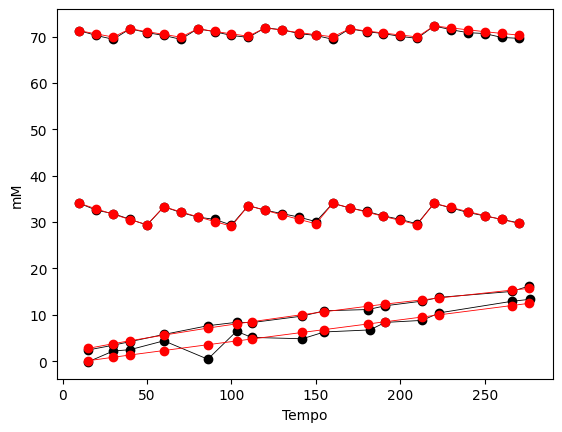

In [26]:

fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CAB,'-or',linewidth=0.6)
plt.plot(t_p, CAN,'-or',linewidth=0.6)
plt.plot(t_s, CNH,'-or',linewidth=0.6)
plt.plot(t_p, CAOH,'-or',linewidth=0.6)
plt.xlabel('Tempo')
plt.ylabel('mM')

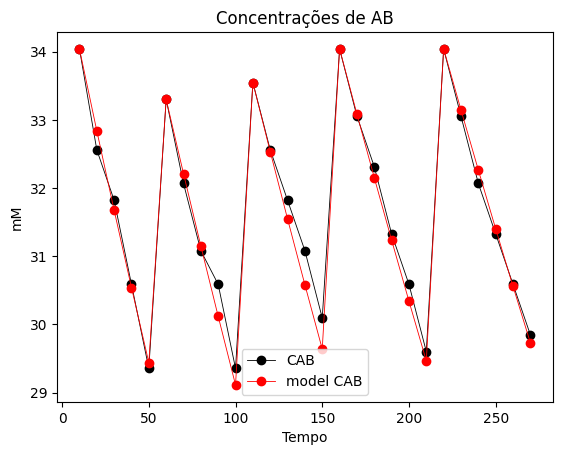

In [27]:
fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CAB,'-or',linewidth=0.6)
plt.title(f'Concentrações de AB')
plt.legend(['CAB','model CAB'])
plt.xlabel('Tempo')
plt.ylabel('mM');

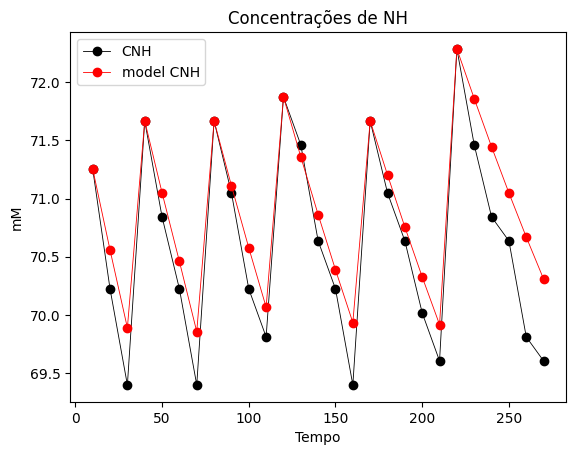

In [28]:
fig = plt.figure()
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_s, CNH,'-or',linewidth=0.6)
plt.title(f'Concentrações de NH')
plt.legend(['CNH','model CNH']);
plt.xlabel('Tempo')
plt.ylabel('mM');

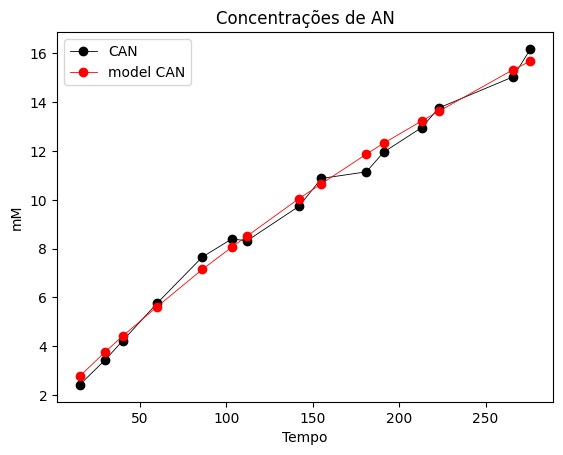

In [29]:
fig = plt.figure()

plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_p, CAN,'-or',linewidth=0.6)
plt.title(f'Concentrações de AN')
plt.legend(['CAN','model CAN']);
plt.xlabel('Tempo')
plt.ylabel('mM');

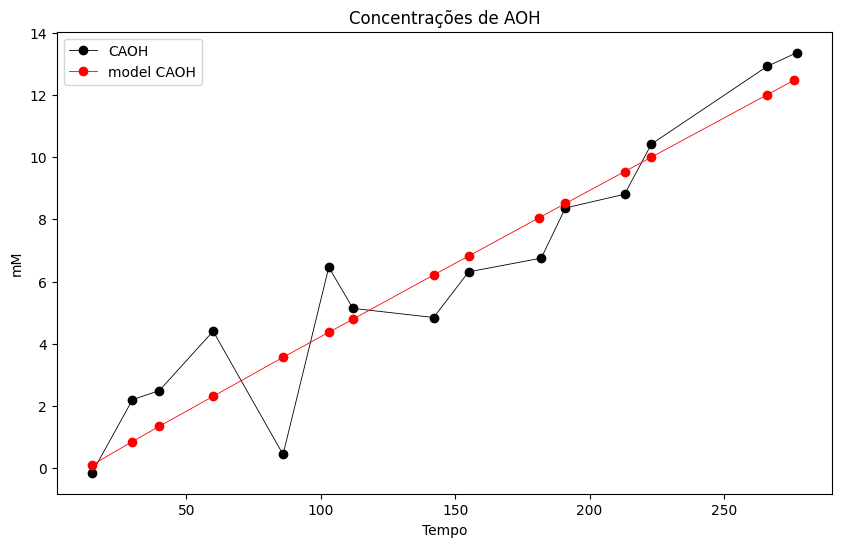

In [30]:
fig = plt.figure(figsize=(10,6))

plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_p, CAOH,'-or',linewidth=0.6)
plt.title(f'Concentrações de AOH')
plt.legend(['CAOH','model CAOH'])
plt.xlabel('Tempo')
plt.ylabel('mM');